In [1]:
# -*- coding: utf-8 -*-


from __future__ import division

import numpy as np
import matplotlib.pylab as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import interpolate

plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Arial']


def p3d_plot(fig_dims, time, P, L, pos, suffix='', plot_dir=''):
    fig = plt.figure(figsize=fig_dims)
    ax = fig.add_subplot(projection='3d')
    nt = len(time)
    x = np.linspace(0, L, nt)
    Y, X = np.meshgrid(x, time)
    pt = P.shape[0]
    dz = int(pt/nt)
    Z = P[0:pt:dz,:]
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis,
                  linewidth=0, antialiased=False)
    ax.set_xlabel('t (s)')
    ax.set_ylabel('z (cm)')
    ax.set_zlabel('pressure (mmHg)')
    ax.set_xlim([min(time), max(time)])
    ax.set_ylim([min(x), max(x)])
    fig.colorbar(surf, shrink=0.5, aspect=5)
    if plot_dir == '':
        fig.show()
    else:
        fname = "%s/%s/%s_p3d%d.png" % (plot_dir, suffix, suffix, pos)
        fig.savefig(fname, dpi=600, bbox_inches='tight')
    
    
def q3d_plot(fig_dims, time, U, L, pos, suffix='', plot_dir=''):
    fig = plt.figure(figsize=fig_dims)
    ax = fig.add_subplot(projection='3d')
    nt = len(time)
    x = np.linspace(0, L, nt)
    Y, X = np.meshgrid(x, time)
    pt = U.shape[0]
    dz = int(pt/nt)
    Z = U[0:pt:dz,:]
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis,
                  linewidth=0, antialiased=False)
    ax.set_xlabel('t (s)')
    ax.set_ylabel('z (cm)')
    ax.set_zlabel('flow rate (cm^3/s)')
    ax.set_xlim([min(time), max(time)])
    ax.set_ylim([min(x), max(x)])
    fig.colorbar(surf, shrink=0.5, aspect=5)
    if plot_dir == '':
        fig.show()
    else:
        fname = "%s/%s/%s_q3d%d.png" % (plot_dir, suffix, suffix, pos)
        fig.savefig(fname, dpi=600, bbox_inches='tight')
        



C:\Users\cbnor\AppData\Local\Temp\ipykernel_13532\2615119106.py:25: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  f = interpolate.interp2d(t, x, P, kind='linear')
C:\Users\cbnor\AppData\Local\Temp\ipykernel_13532\2615119106.py:26: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for reg

(2.742, 3.656)

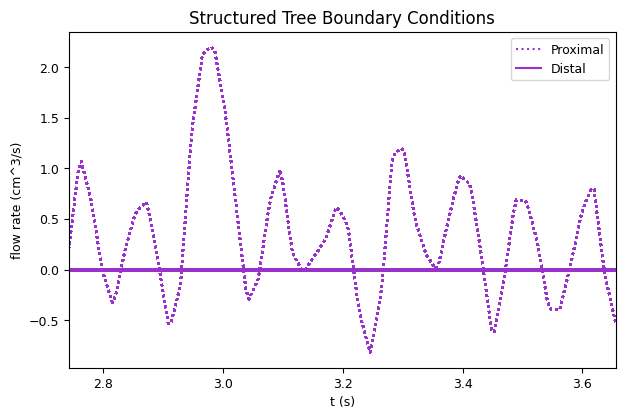

In [2]:

plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Arial']

suffix = 'vessel_0_3wk' 
plot_dir = 'C:\\Users\\cbnor\\Documents\\Full Body Flow Model Project\\VamPy_3wk'

T = 0.914
tc = 4
tf = T*tc
    
Ru = 0.73 
lam = 56.22 
    
L = Ru *lam

    
P = np.loadtxt('C:\\Users\\cbnor\\Documents\\Full Body Flow Model Project\\VamPy_ST\\p1_VamPy_ST.csv', delimiter=',')
U = np.loadtxt('C:\\Users\\cbnor\\Documents\\Full Body Flow Model Project\\VamPy_ST\\u1_VamPy_ST.csv', delimiter=',')
t = np.linspace(tf-T, tf, P.shape[1])
x = np.linspace(0,L,P.shape[0])
f = interpolate.interp2d(t, x, P, kind='linear')
g = interpolate.interp2d(t, x, U, kind='linear')
    
x = np.linspace(0, L, len(t))
P = f(t, x)
U = g(t, x)
    
WIDTH = 510  # the number latex spits out
FACTOR = 1.0  # the fraction of the width you'd like the figure to occupy
fig_width_pt  = WIDTH * FACTOR
inches_per_pt = 1.0 / 72.27
golden_ratio  = (np.sqrt(5) - 1.0) / 2.0  # because it looks good
fig_width_in  = fig_width_pt * inches_per_pt  # figure width in inches
fig_height_in = fig_width_in * golden_ratio   # figure height in inches
fig_dims    = [fig_width_in, fig_height_in] # fig dims as a list
    
#p3d_plot(fig_dims, t, P, L, pos, suffix, plot_dir)
#q3d_plot(fig_dims, t, U, L, pos, suffix, plot_dir)

nt = len(t)
x = np.linspace(0, L, nt)
Y, X = np.meshgrid(x, t)
pt = U.shape[0]
dz = int(pt/nt)
Z = U[0:pt:dz,:]


plt.figure(figsize=fig_dims)
plt.plot( X, Z[:,0], label = "Proximal", c = 'darkorchid', ls = 'dotted')
plt.plot(X, Z[:,-1], label = "Distal", c= 'darkorchid')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())





plt.title('Structured Tree Boundary Conditions')
plt.xlabel('t (s)')
plt.ylabel('flow rate (cm^3/s)')
plt.xlim([min(t), max(t)])




#fname = "%s/%s/%s_q3d%d.png" % (plot_dir, suffix, suffix, pos)
#ig.savefig(fname, dpi=600, bbox_inches='tight')
        


    
    


C:\Users\cbnor\AppData\Local\Temp\ipykernel_13532\2356341709.py:25: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  f = interpolate.interp2d(t, x, P, kind='linear')
C:\Users\cbnor\AppData\Local\Temp\ipykernel_13532\2356341709.py:26: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for reg

(2.742, 3.656)

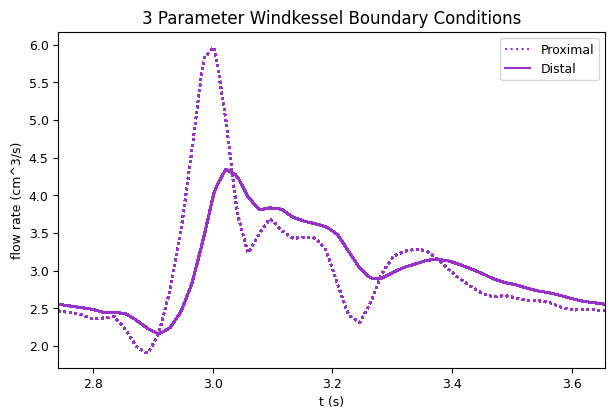

In [3]:

plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Arial']

suffix = 'vessel_0_3wk' 
plot_dir = 'C:\\Users\\cbnor\\Documents\\Full Body Flow Model Project\\VamPy_3wk'

T = 0.914
tc = 4
tf = T*tc
    
Ru = 0.73 
lam = 56.22 
    
L = Ru *lam

    
P = np.loadtxt('C:\\Users\\cbnor\\Documents\\Full Body Flow Model Project\\VamPy_3wk\\p1_VamPy_3wk.csv', delimiter=',')
U = np.loadtxt('C:\\Users\\cbnor\\Documents\\Full Body Flow Model Project\\VamPy_3wk\\u1_VamPy_3wk.csv', delimiter=',')
t = np.linspace(tf-T, tf, P.shape[1])
x = np.linspace(0,L,P.shape[0])
f = interpolate.interp2d(t, x, P, kind='linear')
g = interpolate.interp2d(t, x, U, kind='linear')
    
x = np.linspace(0, L, len(t))
P = f(t, x)
U = g(t, x)
    
WIDTH = 510  # the number latex spits out
FACTOR = 1.0  # the fraction of the width you'd like the figure to occupy
fig_width_pt  = WIDTH * FACTOR
inches_per_pt = 1.0 / 72.27
golden_ratio  = (np.sqrt(5) - 1.0) / 2.0  # because it looks good
fig_width_in  = fig_width_pt * inches_per_pt  # figure width in inches
fig_height_in = fig_width_in * golden_ratio   # figure height in inches
fig_dims    = [fig_width_in, fig_height_in] # fig dims as a list
    
#p3d_plot(fig_dims, t, P, L, pos, suffix, plot_dir)
#q3d_plot(fig_dims, t, U, L, pos, suffix, plot_dir)



    
nt = len(t)
x = np.linspace(0, L, nt)
Y, X = np.meshgrid(x, t)
pt = U.shape[0]
dz = int(pt/nt)
Z = U[0:pt:dz,:]


plt.figure(figsize=fig_dims)
plt.plot( X, Z[:,0], label = "Proximal", c = 'darkorchid', ls = 'dotted')
plt.plot(X, Z[:,-1], label = "Distal", c= 'darkorchid')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())





plt.title('3 Parameter Windkessel Boundary Conditions')
plt.xlabel('t (s)')
plt.ylabel('flow rate (cm^3/s)')
plt.xlim([min(t), max(t)])



#fname = "%s/%s/%s_q3d%d.png" % (plot_dir, suffix, suffix, pos)
#ig.savefig(fname, dpi=600, bbox_inches='tight')